Simulate the predator-prey equations below (these are a more realistic version of the Lokta-Volterra equations)
$$
\frac{dx}{dt} = x(1-x) - \frac{axy}{d+x} \\
\frac{dy}{dt} = by(1 - \frac{y}{x})
$$
for a=1, d=0.1, and b∈[0.1,0.5]


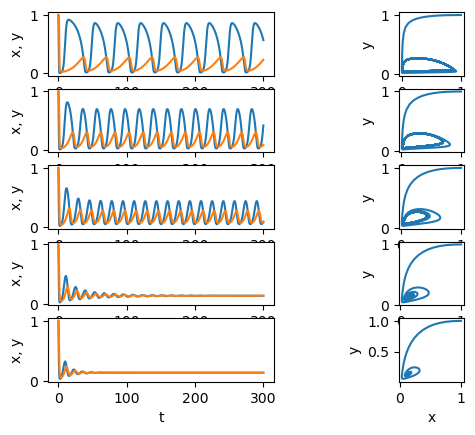

In [2]:
# Numerical shooting worksheet: Evolutionary prototyping
import numpy as np
import matplotlib.pyplot as plt

from Helpers.solvers import solve_to
# Define ODE
def fun(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    return np.array([x*(1-x) - (a*x*y)/(d+x), b*y*(1 - y/x)])

t0 = 0
y0 = np.array([1, 1])
t_max = 300
deltat_max = 0.1

# Solve ODE
timeSeries = []
b_args = [0.1, 0.2, 0.3, 0.4, 0.5]
for b in b_args:
    timeSeries.append(solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=deltat_max, args=(1.5, 0.1, b)))

# Plot results: subplot for each b
fig, axs = plt.subplots(len(b_args), 2)

for i, b in enumerate(b_args):
    # Plot x(t), y(t) on the left. Plot dy/dx on the right.
    axs[i, 0].plot(timeSeries[i][0], timeSeries[i][1][:, 0], label='b = {} \nx(t)'.format(b))
    axs[i, 0].plot(timeSeries[i][0], timeSeries[i][1][:, 1], label='y(t)')
    axs[i, 0].set_xlabel('t')
    axs[i, 0].set_ylabel('x, y')

    axs[i, 1].plot(timeSeries[i][1][:, 0], timeSeries[i][1][:, 1], label='b = {} \ndy/dx'.format(b))
    axs[i, 1].set_aspect('equal')
    axs[i, 1].set_xlabel('x')
    axs[i, 1].set_ylabel('y')
plt.show()

In [5]:
import numpy as np

from Helpers.solvers import shooting

# Define ODE
def ode(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    dxdt = x*(1-x) - (a*x*y)/(d+x)
    dydt = b*y*(1 - y/x)
    return np.array([dxdt, dydt])


# Define the phase function and the condition
def phase_function(t, y):
    dx, dy = ode(t, y)
    return dx

# Initial guess
U0 = np.array([0.6, 0.8, 35])
X0, T = shooting(U0, ode, phase_function)
print(X0, T)

[0.81896951 0.1663615 ] 34.06739419385612


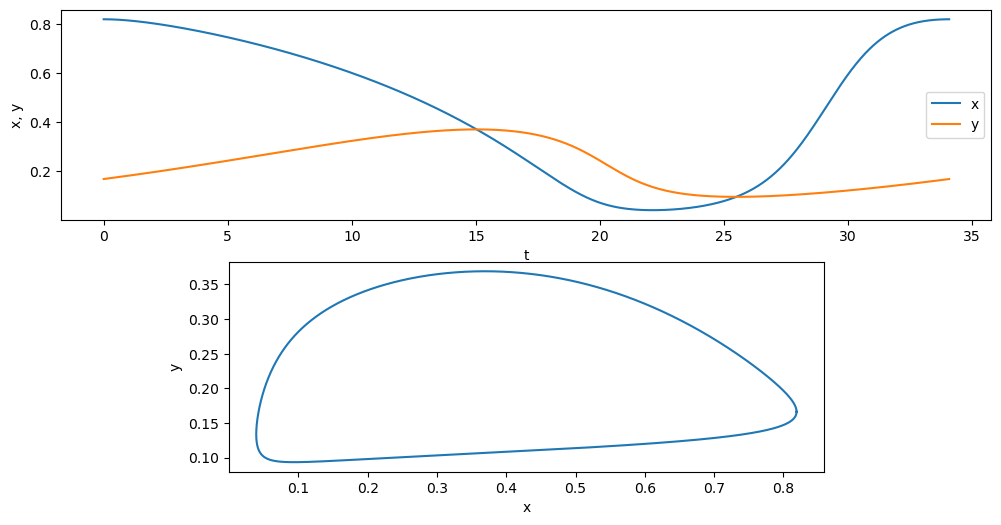

In [6]:
from Helpers.plotting import plot_phase_plane_2D

t, y = solve_to(ode, 0, X0, t_max=T, n_max=None, method='RK4', deltat_max=0.01)

plot_phase_plane_2D(t, y)